<a href="https://www.kaggle.com/adhang/stroke-prediction-basic-eda?scriptVersionId=88778103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stroke Prediction
Author: Adhang Muntaha Muhammad
___
**Contents**
1. Dataset Information
2. Importing Libraries
3. Reading Dataset
4. Dataset Overview
5. Basic EDA
6. Conclusions

# 1. Dataset Information
This dataset is used to predict whether a patient is likely to get a stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
<br><br>
**Attribute Information**
1. `id` <br>
    unique identifier
2. `gender` <br>
    - `Male`
    - `Female`
    - `Other`
3. `age` <br>
    age of the patient
4. `hypertension` <br>
    - `1` if the patient has hypertension
    - `0` if the patient doesn't have hypertension
5. `heart_disease` <br>
    - `1` if the patient has a heart disease
    - `0` if the patient doesn't have any heart diseases
6. `ever_married` <br>
    - `Yes`
    - `No`
7. `work_type` <br>
    - `children`
    - `Govt_job`
    - `Never_worked`
    - `Private`
    - `Self-employed`
8. `Residence_type` <br>
    - `Rural`
    - `Urban`
9. `avg_glucose_level` <br>
    average glucose level in blood
10. `bmi` <br>
    body mass index
11. `smoking_status` <br>
    - `formerly smoked`
    - `never smoked`
    - `smokes`
    - `Unknown` if the information is unavailable for this patient
12. `stroke` <br>
    - `1` if the patient has had a stroke
    - `0` if the patient has not had a stroke

# 2. Importing Libraries

In [1]:
!pip install empiricaldist

  Preparing metadata (setup.py) ... - done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10737 sha256=9fc72b4c22abde0c7c60aefeb2a952eb0f7bfaa81696ca90541ba6b38b494f8b
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [2]:
import numpy as np 
import pandas as pd
from empiricaldist import Pmf, Cdf

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('patch', edgecolor='black')
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})

# 3. Reading Dataset

In [3]:
path = '../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'

data = pd.read_csv(path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Change to Lower Case
The `Residence_type` column has uppercase on the first character. I will rename the column name, just to make it more consistent.

In [4]:
data.rename(columns={'Residence_type':'residence_type'}, inplace=True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


There are some datapoints that have upper-case character. Since using upper-case is not necessary in this case, I will change it to be lower-case. At some point, it will prevent me from doing a miss calculation. For example `Urban` and `UrBaN` will be treated as different value (different category for this case) even though they actually have the same meaning.

In [5]:
column_list = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in column_list:
    data[col] = data[col].str.lower()
    
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


# 4. Basic Data Exploratory

## Data Type

In [6]:
data_type = pd.DataFrame(data.dtypes).T.rename({0:'data types'})
data_type

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
data types,int64,object,float64,int64,int64,object,object,object,float64,float64,object,int64


## Categorical Value

## Total Data

In [7]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
total data,5110,5110,5110,5110,5110,5110,5110,5110,5110,4909,5110,5110


## Null Values

### Total Null Values

In [8]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
total null,0,0,0,0,0,0,0,0,0,201,0,0


### Null Values Percentage

In [9]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.933464,0.0,0.0


## Data Info

In [10]:
data_info = pd.concat([data_type, data_count, data_null_total, data_null_percentage.round(2)], axis=0)
data_info

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
data types,int64,object,float64,int64,int64,object,object,object,float64,float64,object,int64
total data,5110,5110,5110,5110,5110,5110,5110,5110,5110,4909,5110,5110
total null,0,0,0,0,0,0,0,0,0,201,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.93,0.0,0.0


It's similar to info() method, but in different representation.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Duplicate Values

In [12]:
data.duplicated().sum()

0

Our dataset doesn't have any duplicate values. It's a good sign.

# 5. Data Distribution

## Categorical Data

In [13]:
data.drop('id', axis=1, inplace=True)

In [14]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1


From this output, we know that some of the attributes are categorical, such as:
- `gender`
- `hypertension`
- `heart_disease`
- `ever_married`
- `work_type`
- `reisdence_type`
- `smoking_status`
- `stroke`

Although the description of the dataset has mentioned what the categories of each attribute are, it would be better if we double-checked.

In [15]:
column_list = ['gender', 'hypertension', 'heart_disease',
               'ever_married', 'work_type', 'residence_type',
               'smoking_status', 'stroke']

In [16]:
for col in column_list:
  display(pd.DataFrame(data[col].value_counts()).style.background_gradient(vmin=0, subset=col))

,gender
female,2994
male,2115
other,1


,hypertension
0,4612
1,498


,heart_disease
0,4834
1,276


,ever_married
yes,3353
no,1757


,work_type
private,2925
self-employed,819
children,687
govt_job,657
never_worked,22


,residence_type
urban,2596
rural,2514


,smoking_status
never smoked,1892
unknown,1544
formerly smoked,885
smokes,789


,stroke
0,4861
1,249


It's not really a plot, but a table with color gradations like this one can give us insight into the distribution of categories. The darker it is, the more data in the category.

### Pivot Table

### Probability Mass Function
The categorical data only contain a few categories, so we can use the probability mass function to see the distribution of categories.

In [17]:
for col in column_list:
  pmf_data = Pmf.from_seq(data[col], normalize=True)
  pmf_data = pd.DataFrame({col:pmf_data.index, 'pmf':pmf_data.values})
  pmf_data.set_index(col, inplace=True)
  display(pmf_data.style.background_gradient(vmin=0, subset='pmf'))

,pmf
gender,
female,0.585910
male,0.413894
other,0.000196


,pmf
hypertension,
0,0.902544
1,0.097456


,pmf
heart_disease,
0,0.945988
1,0.054012


,pmf
ever_married,
no,0.343836
yes,0.656164


,pmf
work_type,
children,0.134442
govt_job,0.128571
never_worked,0.004305
private,0.572407
self-employed,0.160274


,pmf
residence_type,
rural,0.491977
urban,0.508023


,pmf
smoking_status,
formerly smoked,0.173190
never smoked,0.370254
smokes,0.154403
unknown,0.302153


,pmf
stroke,
0,0.951272
1,0.048728


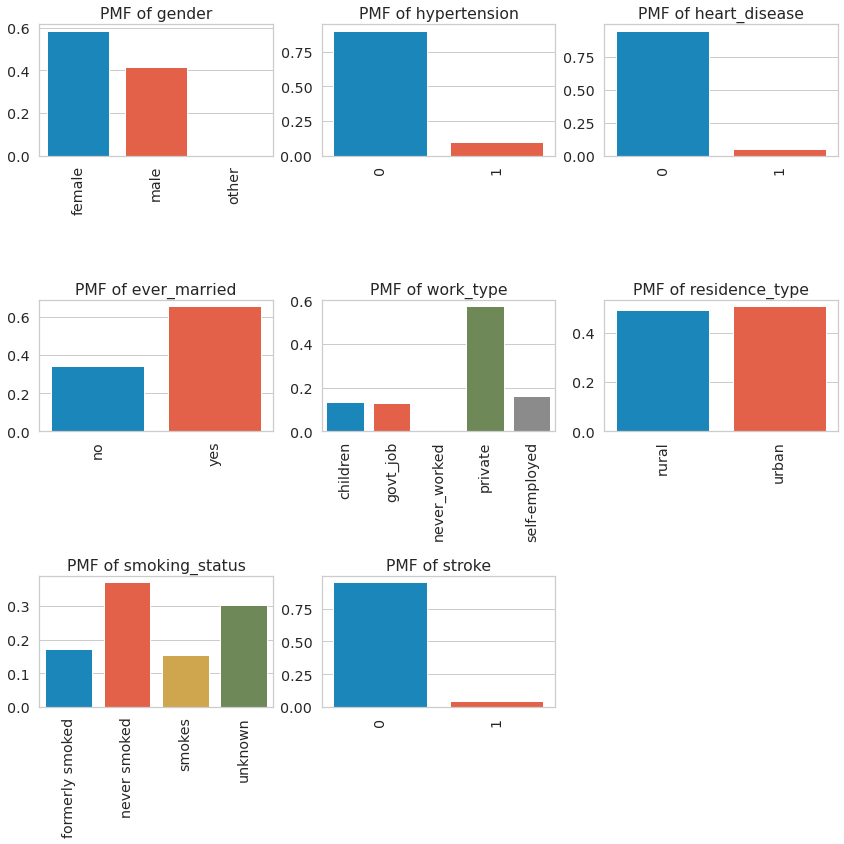

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(12,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_list):
  pmf_data = Pmf.from_seq(data[col], normalize=True)
  pmf_data = pd.DataFrame({col:pmf_data.index, 'pmf':pmf_data})

  sns.barplot(data=pmf_data, x=col, y='pmf', ax=axes_list[i])
  axes_list[i].set_title(f'PMF of {col}')
  axes_list[i].set_xlabel('')
  axes_list[i].set_ylabel('')
  plt.setp(axes_list[i].get_xticklabels(), rotation='vertical')

axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

From this plot, we can see that:
- On the `gender` plot, the `other` category is barely visible because it only has 1 patient
- Based on `hypertension` plot, most of patient doesn't have hypertension
- Based on `heart_disease` plot, most of patient doesn't have heart disease
- On the `work_type` plot, the `never_worked` category is barely visible because it only contains 0.4% of the total patients
- On the `stroke` plot, which is the target attribute, the category distribution is not balanced

### Pivot Table
I'm just curious, so I'll try to find out how many patients that don't have any comorbidities, only have hypertension, only have heart disease, or have both hypertension and heart disease.

In [19]:
pd.crosstab(index=[data['hypertension'], data['heart_disease']],
            columns=data['stroke'], margins=True).style.background_gradient(vmin=0)

From this pivot table, we can see that most patients didn't have any comorbidities.

In [20]:
pd.crosstab(index=[data['hypertension'], data['heart_disease']],
            columns=data['stroke'], margins=True, normalize=True).round(3).style.background_gradient(vmin=0)

- Most patients didn't have any comorbidities
- Most patients didn't have stroke
- The category distribution is not balanced. Most of patient doesn't get stroke. Only about 5% of patients have a stroke.

In [21]:
pd.crosstab(index=data['residence_type'],
            columns=data['stroke'], normalize=True).round(3).style.background_gradient(vmin=0)

stroke,0,1
residence_type,,
rural,0.470000,0.022000
urban,0.482000,0.026000


From this pivot table, we know that the distribution between residence type is balanced.

In [22]:
pd.crosstab(index=data['smoking_status'],
            columns=data['stroke'], normalize=True).round(3).style.background_gradient(vmin=0)

stroke,0,1
smoking_status,,
formerly smoked,0.159000,0.014000
never smoked,0.353000,0.018000
smokes,0.146000,0.008000
unknown,0.293000,0.009000


Surprisingly, most of the stroke patients had never smoked before. But, as I already mentioned, the `stroke` attribute is not balanced. So that it can lead to bias, because we know that smoking is not good for our health.
<br><br>
But yes, our knowledge (that smoking is not good for our health) can also bias our analysis.

### Bar Plot
From the previous pivot table, we can understand the distribution of the data. However, some people (especially those who are not technically savvy) may not understand "What does 0 mean? What about 1?" on the index or column name. So, I'm going to visualize it using the plot bar.
<br><br>
Also, providing a pivot table full of numbers can sometimes be overwhelming for others.

In [23]:
# creating the logical conditions
conditions = [ ~(data['hypertension'] | data['heart_disease']).astype(bool),
              ((data['hypertension'] == 1) & (data['heart_disease'] == 0)).astype(bool),
              ((data['hypertension'] == 0) & (data['heart_disease'] == 1)).astype(bool),
              (data['hypertension'] & data['heart_disease']).astype(bool)]

# values for each conditions (if True)
values = ['No Comorbidities', 'Only Hypertension', 'Only Heart Disease', 'Both Comorbidities']

# assign the condition and the values
disease_check = np.select(conditions, values)
disease_category = pd.Series(disease_check)

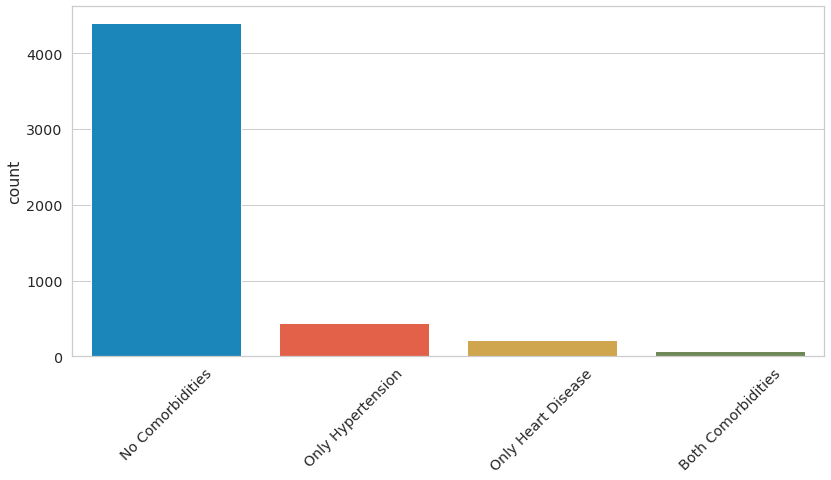

In [24]:
mapping = {val: i for i, val in enumerate(values)}
key = disease_category.map(mapping)
# disease_category = disease_category.iloc[key.argsort()]

plt.figure(figsize=(12,6))
ax = sns.countplot(x=disease_category.iloc[key.argsort()])
# plt.xticks(rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

Just like on the pivot table, we can see that most patients ddin't have any comorbidities.

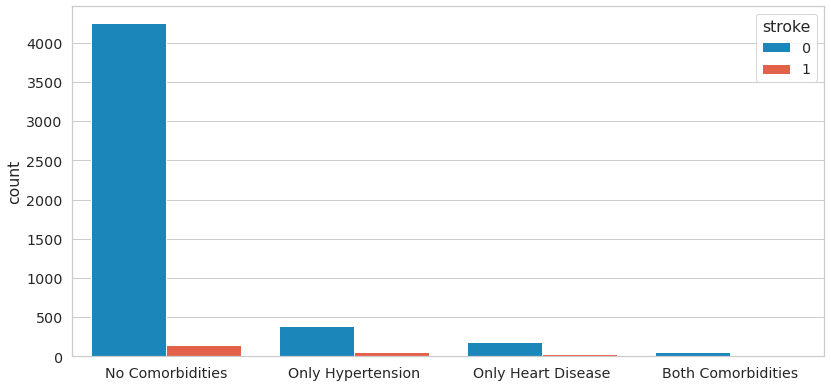

In [25]:
# create a new attribute
data['disease_category'] = disease_category

# change it to categorical data type, and sort it (just for better viz on the next step)
data['disease_category'] = data['disease_category'].astype('category')
data['disease_category'] = data['disease_category'].cat.set_categories(values)
data['disease_category'] = data['disease_category'].cat.set_categories(values)
data.sort_values(['disease_category'])

# plot the distribution of each category
plt.figure(figsize=(12,6))
# sns.histplot(data=data, x='disease_category', hue='stroke', multiple='stack').set_xlabel('')
# sns.histplot(data=data, x='disease_category', stat='density', hue='stroke', multiple='stack').set_xlabel('')
sns.countplot(data=data, x='disease_category', hue='stroke').set_xlabel('')
plt.show()

The percentage of patient who had stroke is small,  it's beacause the data distribution on `stroke` attribute is not balanced. Most of patient doesn't get stroke.

In [26]:
data_stroke = data[(data['stroke'] == 1)]
data_stroke['disease_category'].value_counts()/data['disease_category'].value_counts()

No Comorbidities      0.033864
Only Hypertension     0.122120
Only Heart Disease    0.160377
Both Comorbidities    0.203125
Name: disease_category, dtype: float64

### Pie Chart
Another way to see the portion of categories is using a pie chart. But, we must be very careful when using this chart type. Sometimes, it makes our visualization being ambiguous.

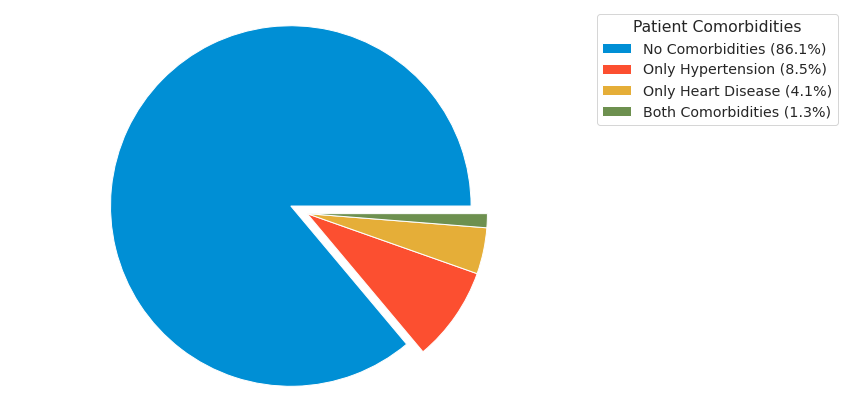

In [27]:
pie_data = disease_category.value_counts(normalize=True).values * 100
pie_label = [f'{l} ({s:0.1f}%)' for l, s in zip(values, pie_data)]

plt.figure(figsize=(12,6))
wedges, texts = plt.pie(pie_data, startangle=0, explode=[0.1, 0, 0, 0])
plt.axis('equal')
plt.legend(wedges, pie_label, title='Patient Comorbidities', loc='upper left', bbox_to_anchor=(1,0,0.5,1))
plt.tight_layout()
plt.show()

As we have seen, most patients have no comorbidities. Using a pie chart is good if it can clearly tell us about the portion of the data.

## Numerical Data
For numerical data, we can use histogram and kde (kernel density estimator) to see the data distribution and density.

In [28]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,disease_category
0,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1,Only Heart Disease
1,female,61.0,0,0,yes,self-employed,rural,202.21,NaN,never smoked,1,No Comorbidities
2,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1,Only Heart Disease
3,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1,No Comorbidities
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1,Only Hypertension


From this output, we know that some of the attributes are numerical, such as:
- `age`
- `avg_glucose_level`
- `bmi`

### Histogram

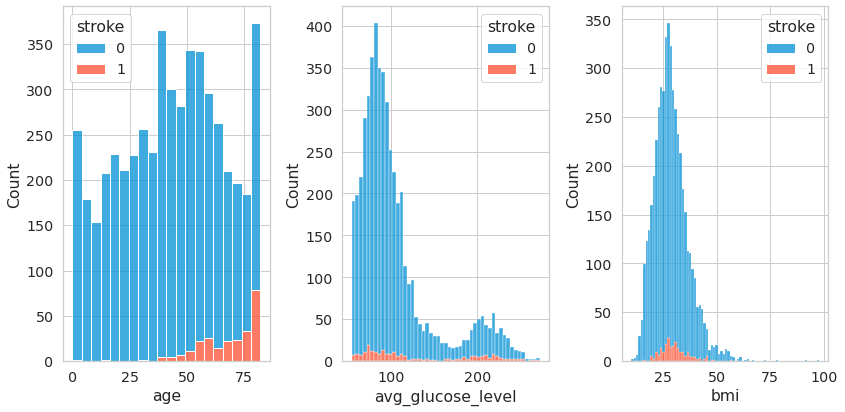

In [29]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.histplot(data=data, x=col, hue='stroke', multiple='stack', ax=ax[i])

plt.tight_layout()
plt.show()

Our dataset does not appear to be in a normal distribution, especially the `avg_glucose_level` and `bmi` attributes which have a right skewed form.

### Density

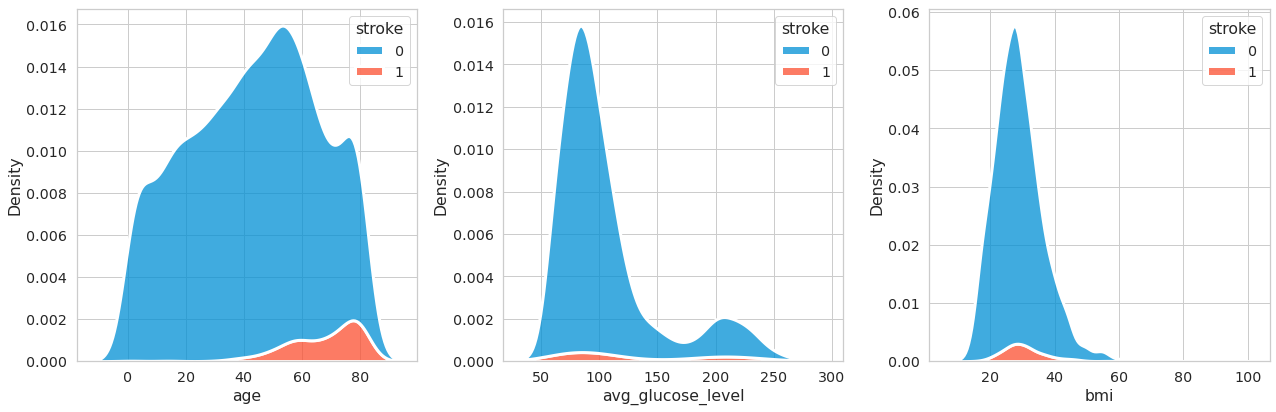

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_list):
  sns.kdeplot(data=data, x=col, linewidth=3, hue='stroke', fill=True, multiple='stack', ax=ax[i])

plt.tight_layout()
plt.show()

With one glance, we can see that most patients who have a stroke are around the age of 60-80.

### Histogram Density
It's just another way to see histogram and kde plot at the same time.

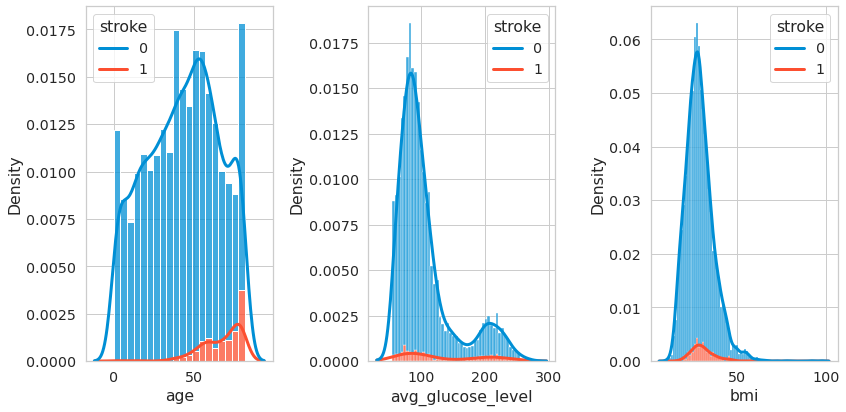

In [31]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.histplot(data=data, x=col, stat='density', hue='stroke', multiple='stack', ax=ax[i])
  sns.kdeplot(data=data, x=col, linewidth=3, hue='stroke', fill=False, multiple='stack', ax=ax[i])

plt.tight_layout()
plt.show()

### Box Plot
Box plot is very useful to see outliers on our dataset.

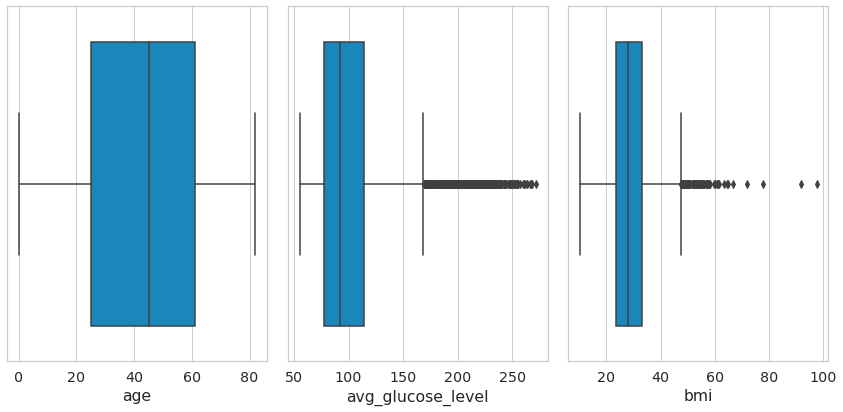

In [32]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.boxplot(data=data, x=col, ax=ax[i])

plt.tight_layout()
plt.show()

Using box plot, we can see there are many outliers on the `avg_glucose_level` and `bmi` attributes.

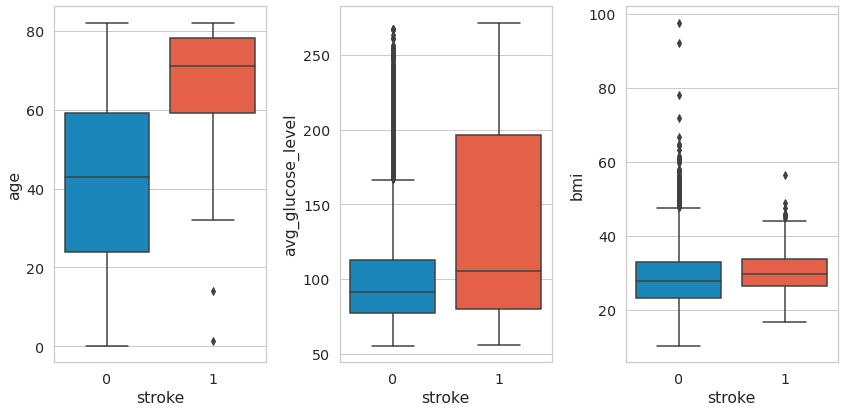

In [33]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.boxplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

If we divide the data based on the `stroke` attribute, we get some important insights:
- Most patients who have had a stroke are over the age of 60. 
- But, it's still possible that younger people can also experience it, as we can see there are some outliers
- We can assume that the age of the patient has a correlation whether the patient had a stroke or not

### Scatter Plot
Scatter plot is usually used to see the correlation between attributes. Let's say, we want to know the correlation between:
- patients age and average glucose level
- patients age and bmi

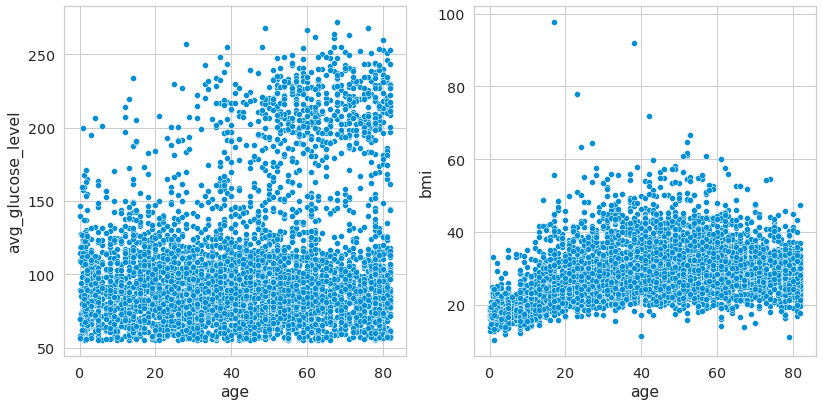

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.scatterplot(data=data, x='age', y='avg_glucose_level', ax=ax[0])
sns.scatterplot(data=data, x='age', y='bmi', ax=ax[1])

plt.show()

From this scatter plot, we can't recognize any correlation between `age` and `avg_glucose_level`. However, `age` and `bmi` seem to have a correlation.

### Regression Plot
Regression plot is intended to add a visual guide that helps to emphasize patterns in a dataset.

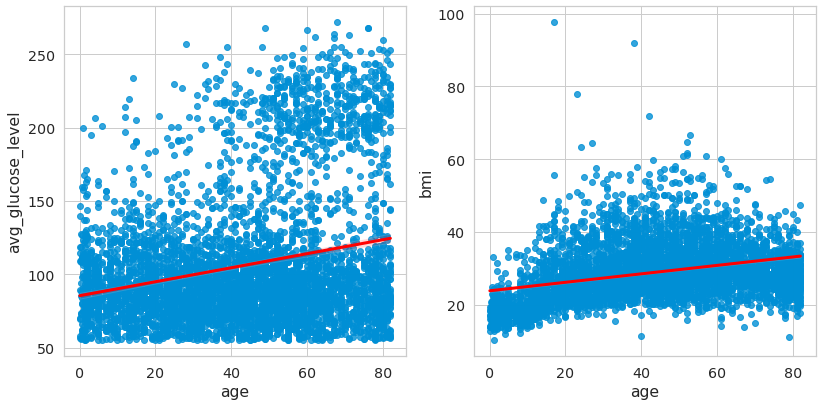

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.regplot(data=data, x='age', y='avg_glucose_level', ax=ax[0], line_kws={'linewidth':3, 'color':'r'})
sns.regplot(data=data, x='age', y='bmi', ax=ax[1], line_kws={'linewidth':3, 'color':'r'})

plt.show()

As we can see, a single straight line (from first-order linear regression) can't describe our dataset pattern. The `age` and `bmi` plot seems to have a curved pattern, so I will try to use the second order.

<Figure size 864x864 with 0 Axes>

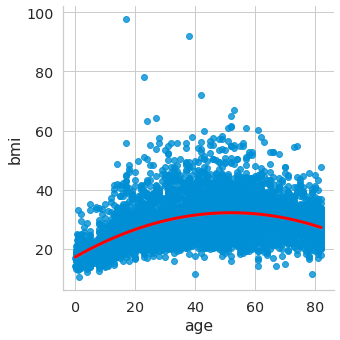

In [36]:
plt.figure(figsize=(12,12))
sns.lmplot(data=data, x='age', y='bmi', order=2, line_kws={'linewidth':3, 'color':'r'})

plt.show()

From this plot, we can see that the line forms a curve. We can assume that patients' age has a correlation with BMI.

### Contour Plot
Using scatter plot, our data most likely to be overplotting. To avoid that, we can use contour plot.

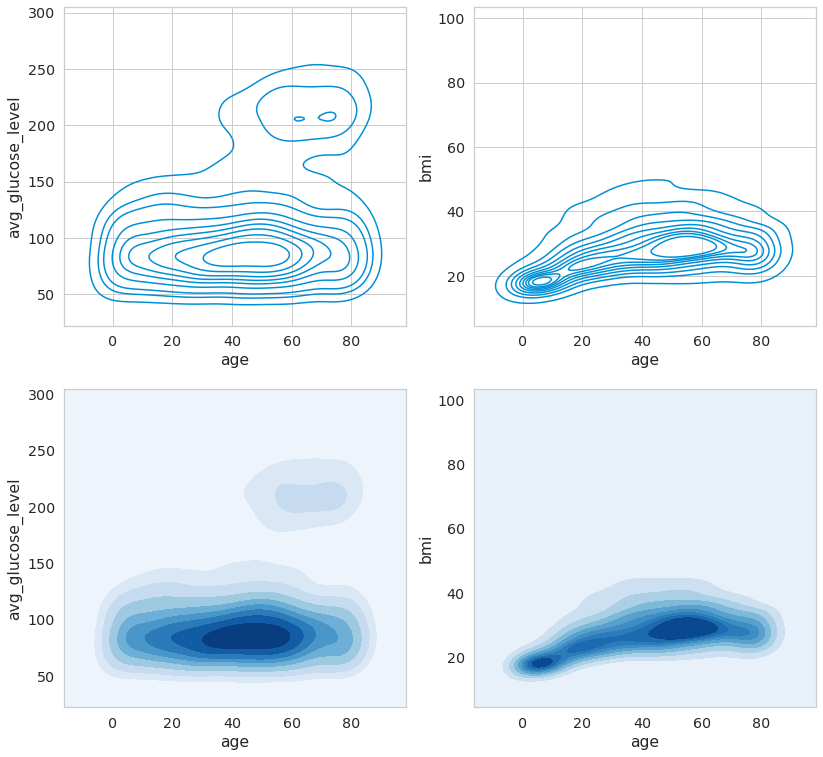

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))

sns.kdeplot(data=data, x='age', y='avg_glucose_level', ax=ax[0,0])
sns.kdeplot(data=data, x='age', y='bmi', ax=ax[0,1])

sns.kdeplot(data=data, x='age', y='avg_glucose_level', cmap='Blues', shade=True, thresh=0, ax=ax[1,0])
sns.kdeplot(data=data, x='age', y='bmi', cmap='Blues', shade=True, thresh=0, ax=ax[1,1])

plt.show()

By using a contour plot, we can find out where the datapoints tend to cluster.

### Heatmap
Another way to see correlation is using heatmap.

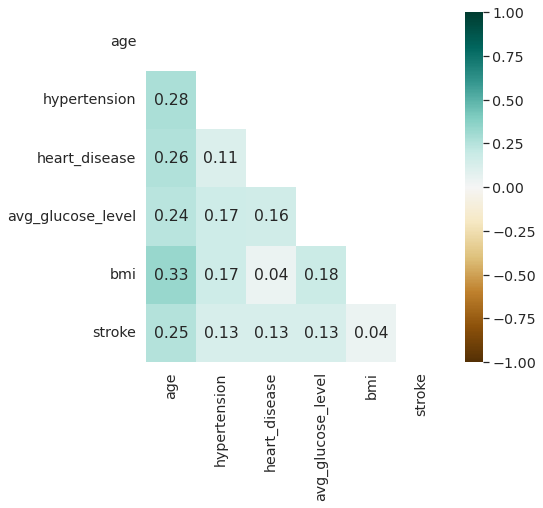

In [38]:
corr_matrix = data.corr().round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

Using heatmap, we can exactly understand the correlation value. As we can see in the last row, the attribute that has the highest correlation with `stroke` is the patients' age. Even though it's not really high, because it's closer to 0 than 1.
<br><br>
This heatmap also confirms my assumption that `age` and `bmi` have a correlation. Surprisingly, that is the highest correlation.

### Joint Plot
Joint plot is used to view histogram and scatter plot at once.

<Figure size 864x432 with 0 Axes>

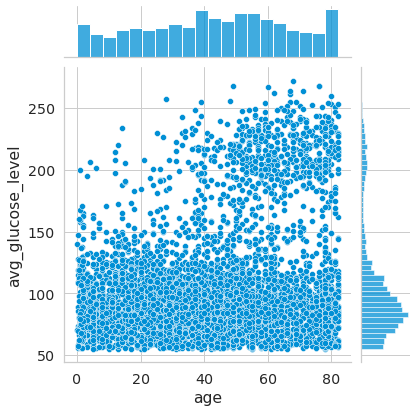

In [39]:
plt.figure(figsize=(12,6))
sns.jointplot(data=data, x='age', y='avg_glucose_level')
plt.show()

<Figure size 864x432 with 0 Axes>

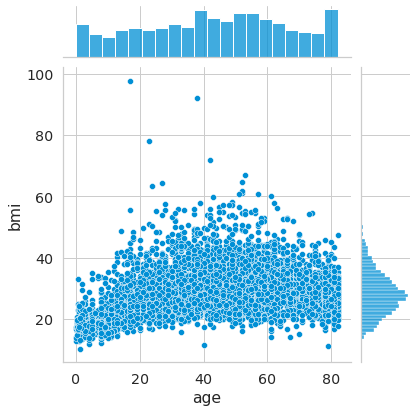

In [40]:
plt.figure(figsize=(12,6))
sns.jointplot(data=data, x='age', y='bmi')
plt.show()

### Pair Plot
This is another way to see the distribution of data. This plot also contains multiple histograms and scatter plots at once.

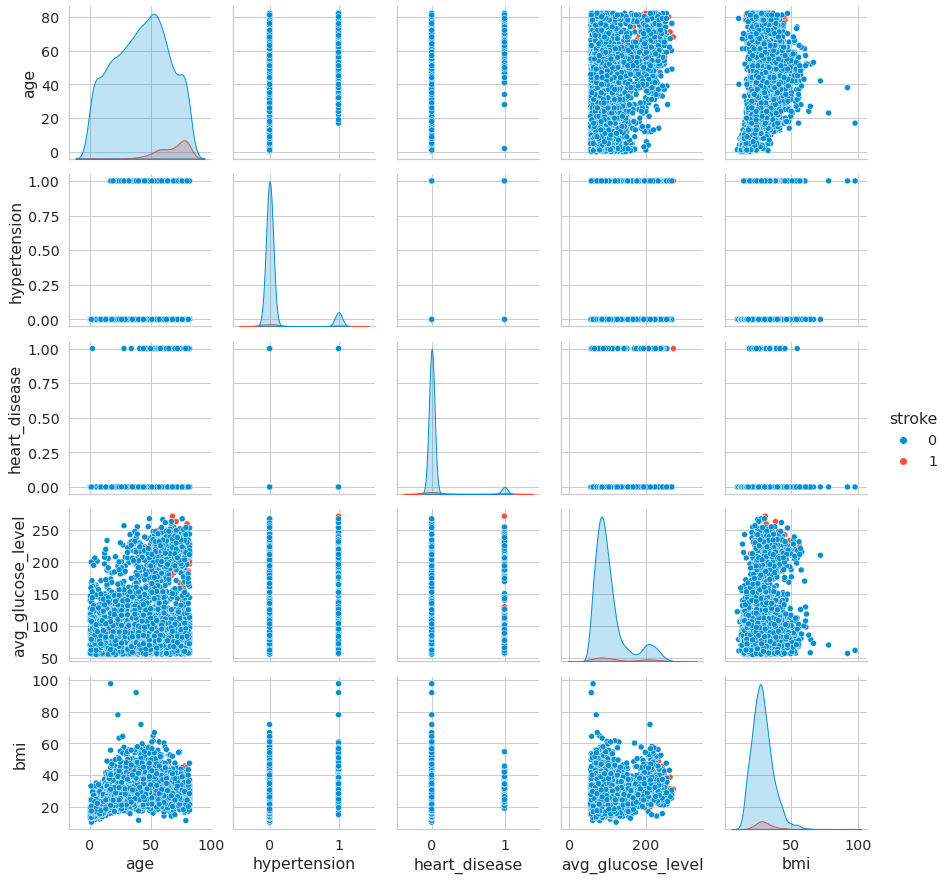

In [41]:
sns.pairplot(data=data, hue='stroke')
plt.show()

Since our dataset contains many categorical values, it's hard to interpret the whole plot.

### Violin Plot
Simply, it's like a combination of a boxplot and density plot.

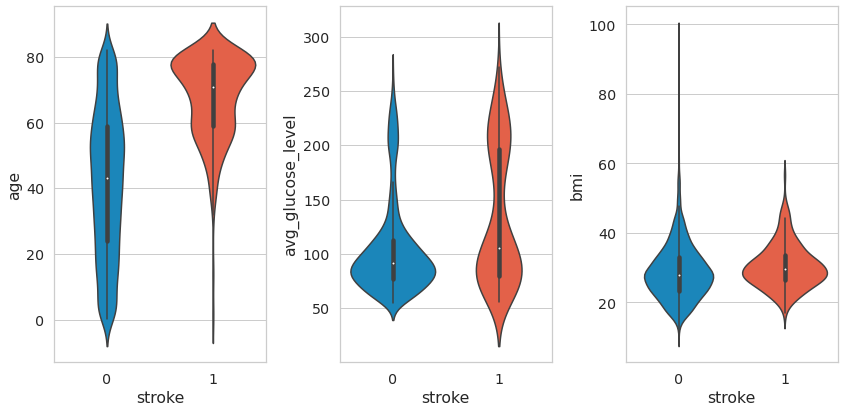

In [42]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.violinplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

- The thinner the body of the violin, the less data it contains.
- At some point, it might just be a line. I'm not really sure, but I think it's the outliers.

# 6. Conclusions
So far, some conclusions for this dataset:
- Most patients didn't have comorbidities (hypertension and or heart disease)
- This dataset target (`stroke`) is not balanced. So, it will affect the performance of machine learning predictions. We can use oversampling, undersampling, or SMOTE to handle this problem.
- The numerical data does not appear to be in a normal distribution, especially the `avg_glucose_level` and `bmi` attributes which have a right-skewed form. We can use log transform, square root transform, or box-cox transform for handling skewed data.
- The numerical data has many outliers, especially on the `avg_glucose_level` and `bmi` attributes. It needs more diagnostic to determine whether we will keep the outliers or remove the outliers.